# CHAPTER 4 - A Simple Way to Incorporate Additional Attributes in Your Model

_pg. 51-66_

## PART 1

_pg. 51-54_

## Working with Additional Attributes

By now much of this code should be familiar to you.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# NOTE: set `loc` to the location of the data file on your system
loc = "/home/ubuntu/CSU/Notebooks/csu-2017/COE.csv"
temp = pd.read_csv(loc)

Now check the first observations contained in `temp`

In [3]:
print temp.head()

   Unnamed: 0        DATE     COE$   COE$_1  #Bids  Quota  Open?
0           0  1990-08-01   7400.0   7750.0    656    472      0
1           1  1990-09-01  11100.0   7400.0   1462    468      0
2           2  1990-10-01   5002.0  11100.0    633    472      0
3           3  1990-11-01   3170.0   5002.0    952    511      0
4           4  1990-12-01   3410.0   3170.0    919    471      0


As per the book, we can drop the first index column `Unnamed: 0` and the `DATE` column from the dataset.

In [4]:
data = temp.drop(temp.columns[[0,1]], axis=1)
print data.head()

      COE$   COE$_1  #Bids  Quota  Open?
0   7400.0   7750.0    656    472      0
1  11100.0   7400.0   1462    468      0
2   5002.0  11100.0    633    472      0
3   3170.0   5002.0    952    511      0
4   3410.0   3170.0    919    471      0


In the book, `COE$_1` is incorrectly described as the one month lagged COE price, when in fact,

+ `COE$` is the current observation's COE price
+ `COE$_1` is the previous observation's COE price

We can see this by looking at the last few observations and see that they are taken on the 1st and 15th of each month.

In [5]:
print temp.tail()

     Unnamed: 0        DATE     COE$   COE$_1  #Bids  Quota  Open?
260         260  2006-11-15  14156.0  12605.0   2122   1360      1
261         261  2006-12-01  14501.0  14156.0   1981   1287      1
262         262  2006-12-15  14669.0  14501.0   1991   1283      1
263         263  2007-01-01  13499.0  14669.0   1708   1290      1
264         264  2007-01-15  13301.0  13499.0   1863   1304      1


#### NOTE
From August 1990 to June 2001, the COE auction used a closed-bid format. In this process, bids were taken in secret and only disclosed at the end of the auction. From April 2003 onwards, the auction exclusively followed an open-bid format.

## Data Processing

In [6]:
# Extract the observed COE prices
y = data['COE$']

# Create the set of additional attributes
#   1) remove `COE$` and `Open?` columns
#   2) transform the data
#   3) restore the `Open?` column
x = data.drop(data.columns[[0,4]], axis=1)
x = x.apply(np.log)
x = pd.concat([x,data['Open?']], axis=1)

Let's check that `data` is correctly formatted and transformed.

In [7]:
print x.head()

     COE$_1     #Bids     Quota  Open?
0  8.955448  6.486161  6.156979      0
1  8.909235  7.287561  6.148468      0
2  9.314700  6.450470  6.156979      0
3  8.517593  6.858565  6.236370      0
4  8.061487  6.823286  6.154858      0


In [8]:
print x.tail()

       COE$_1     #Bids     Quota  Open?
260  9.441849  7.660114  7.215240      1
261  9.557894  7.591357  7.160069      1
262  9.581973  7.596392  7.156956      1
263  9.593492  7.443078  7.162397      1
264  9.510371  7.529943  7.173192      1


## Scaling Attributes and Target

In [9]:
from sklearn import preprocessing

In [10]:
# Scale the set of 4 additional attributes
scaler_x = preprocessing.MinMaxScaler(feature_range=(0,1))
x = np.array(x).reshape((len(x), 4))
x = scaler_x.fit_transform(x)

In [11]:
# Scale the COE price values
scaler_y = preprocessing.MinMaxScaler(feature_range=(0,1))
y = np.array(y).reshape((len(y), 1))
y = np.log(y)
y = scaler_y.fit_transform(y)

## The `pyneurgen` Module

In [12]:
# Need to change data structures to use the `pyneurgen` module
y = y.tolist()
x = x.tolist()

# PART 2

_pg. 59-60, 62-63_

## How to Easily Specify a Model

In [59]:
from pyneurgen.neuralnet import NeuralNet
import random

random.seed(2016)
fit1 = NeuralNet()
fit1.init_layers(4, [7,3], 1)
fit1.randomize_network()       # randomizes the weights and bias of each connection

## Setting a Learning Rate

In [60]:
fit1.set_learnrate(0.05)
fit1.set_all_inputs(x)
fit1.set_all_targets(y)
length = len(x)
learn_end_point = int(length * 0.95)
fit1.set_learn_range(0, learn_end_point)
fit1.set_test_range(learn_end_point + 1, length - 1)

## The Efficient Way to Run Your Model

In [61]:
fit1.layers[1].set_activation_type('tanh')  # could also use `linear` or `sigmoid`
fit1.layers[2].set_activation_type('tanh')

## Run the Model

In [62]:
fit1.learn(epochs=200, show_epoch_results=True, random_testing=False)

epoch: 0 MSE: 0.00375778849486
epoch: 1 MSE: 0.00481815401934
epoch: 2 MSE: 0.00419000621781
epoch: 3 MSE: 0.00377844460056
epoch: 4 MSE: 0.00349184307804
epoch: 5 MSE: 0.00328394827976
epoch: 6 MSE: 0.00312792310141
epoch: 7 MSE: 0.00300711533336
epoch: 8 MSE: 0.0029108045803
epoch: 9 MSE: 0.00283189425012
epoch: 10 MSE: 0.00276556386175
epoch: 11 MSE: 0.00270845542856
epoch: 12 MSE: 0.00265817124983
epoch: 13 MSE: 0.00261295752144
epoch: 14 MSE: 0.00257150087863
epoch: 15 MSE: 0.00253279487716
epoch: 16 MSE: 0.00249605066716
epoch: 17 MSE: 0.00246063619296
epoch: 18 MSE: 0.00242603422732
epoch: 19 MSE: 0.00239181315017
epoch: 20 MSE: 0.0023576065912
epoch: 21 MSE: 0.00232309943533
epoch: 22 MSE: 0.00228801856309
epoch: 23 MSE: 0.00225212725313
epoch: 24 MSE: 0.00221522251978
epoch: 25 MSE: 0.00217713485781
epoch: 26 MSE: 0.00213772995599
epoch: 27 MSE: 0.00209691194297
epoch: 28 MSE: 0.00205462766291
epoch: 29 MSE: 0.00201087136695
epoch: 30 MSE: 0.00196568908151
epoch: 31 MSE: 0.001

# PART 3

_pg. 64-66_

## Assess Performance

In [63]:
mse = fit1.test()
print "test set MSE = {:0.8f}".format(mse)

test set MSE = 0.00010691


#### NOTE
You can use the `test_targets_activations` attribute to view the `(prediction, target)` value pairs.

In [64]:
fit1.test_targets_activations

[[[0.5115646767544664], [0.5219029074507411]],
 [[0.5174090798989919], [0.5285262465782087]],
 [[0.5462942051781285], [0.5291355949957177]],
 [[0.5610954679045019], [0.5758134248107468]],
 [[0.5849053802741075], [0.5882727654419561]],
 [[0.5806239421115522], [0.5994991102328758]],
 [[0.5513256262849617], [0.5612970237574911]],
 [[0.5446984685711735], [0.548488808581793]],
 [[0.5696224247910611], [0.5462026588219878]],
 [[0.5747940838934837], [0.5629858397269402]],
 [[0.5772680753193098], [0.5683904025022325]],
 [[0.559415522274407], [0.5354134299497085]]]

## Visualizing the Data

In [65]:
# GET THE MSE FOR EACH TRAINING EPOCH
mse_train = fit1.accum_mse
epochs = range(fit1.get_epochs())

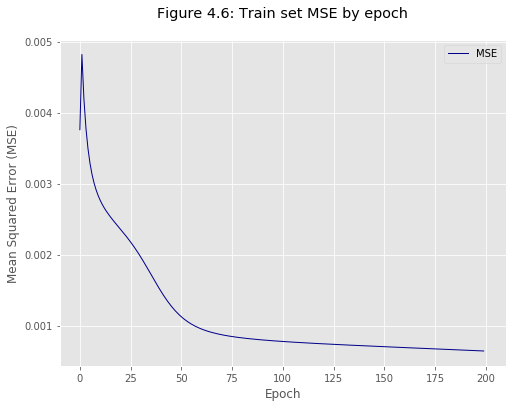

In [66]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8,6)

# FIGURE 4.6 (p. 64)
plt.plot(epochs, mse_train, "-", label="MSE", color="darkblue", linewidth='1')
plt.title("Figure 4.6: Train set MSE by epoch\n")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.xlim([-10,210])
plt.legend()
plt.show()

In [67]:
# GET THE PREDICTIONS AND OBSERVATIONS
preds = list()  # predictions
obs = list()  # observations

for pair in fit1.test_targets_activations:
    obs.append(pair[0][0])
    preds.append(pair[1][0])

def transform(data):
    temp = np.array(data)
    temp = temp.reshape(-1,1)
    temp = scaler_y.inverse_transform(temp)
    return np.exp(temp)

predictions = transform(preds)
observations = transform(obs)

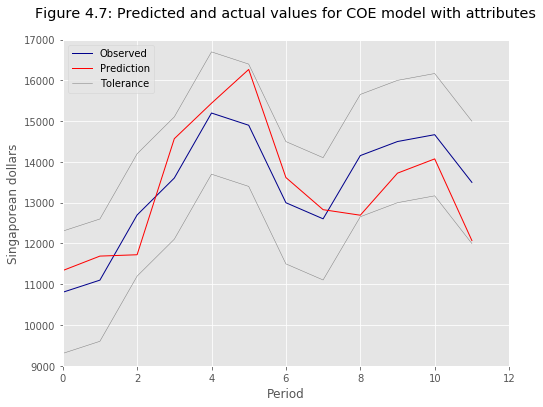

In [68]:
# FIGURE 4.7 (p. 65)
plt.plot(range(12), observations, "-", label="Observed", color="darkblue", linewidth='1')

plt.plot(range(12), predictions, "-", label="Prediction", color="red", linewidth='1')

plt.plot(range(12), observations+1500, "-", label="Tolerance", color="grey", linewidth='0.5')
plt.plot(range(12), observations-1500, "-", color="grey", linewidth='0.5')

plt.title("Figure 4.7: Predicted and actual values for COE model with attributes\n")
plt.xlabel("Period")
plt.ylabel("Singaporean dollars")
plt.xlim([0,12])
plt.ylim([9000, 17000])
plt.legend()
plt.show()